## Created by Aradhya Jain and Ayush Dadhich

IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

DEFINING BASIC VARIABLES

Choosing 5 high performing stocks from different sectors so thst there is as little correlation between them as possible

In [2]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 100000

stocks = ["GHCL.NS","IDFCFIRSTB.NS","TATAMOTORS.NS","NH.NS","EMAMILTD.NS"]

start_date = "2018-10-01"
end_date = "2023-10-01"


PULLING THE DATA AND FORMING A DATABASE

In [3]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    
stock_prices = pd.DataFrame(stock_data)

stock_prices

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2018-10-01 00:00:00+05:30,190.506622,37.349998,228.637421,229.988617,452.207458
2018-10-03 00:00:00+05:30,185.943329,37.500000,226.892853,232.404358,448.896027
2018-10-04 00:00:00+05:30,187.981277,36.700001,222.556366,228.263107,429.798920
2018-10-05 00:00:00+05:30,186.430664,35.349998,215.578110,229.742126,405.394562
2018-10-08 00:00:00+05:30,187.316742,33.750000,211.690231,226.784088,410.928650
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,617.849976,94.300003,618.700012,1062.050049,514.950012
2023-09-26 00:00:00+05:30,620.549988,95.550003,619.799988,1067.800049,519.849976
2023-09-27 00:00:00+05:30,622.150024,97.550003,620.150024,1081.900024,512.000000


CALCULATING LOGRETURNS AND ADDING THAT DATA

In [4]:
log_returns = np.log(stock_prices / stock_prices.shift(1))
log_returns = log_returns[1:]                                 # First row will have Nan value
log_returns.head()

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2018-10-03 00:00:00+05:30,-0.024245,0.004008,-0.007660,0.010449,-0.007350
2018-10-04 00:00:00+05:30,0.010900,-0.021564,-0.019297,-0.017980,-0.043474
2018-10-05 00:00:00+05:30,-0.008283,-0.037478,-0.031857,0.006459,-0.058457
2018-10-08 00:00:00+05:30,0.004742,-0.046318,-0.018199,-0.012959,0.013559
2018-10-09 00:00:00+05:30,-0.027576,-0.004454,-0.141400,0.018310,-0.069947


CALCULATING AVERAGE YEALY RETURNS

In [5]:
print(log_returns.mean()*NUM_TRADING_DAYS)

GHCL.NS          0.239314
IDFCFIRSTB.NS    0.191559
TATAMOTORS.NS    0.206885
NH.NS            0.316636
EMAMILTD.NS      0.032205
dtype: float64


CALCULATING YEARLY VOLATILITY

In [6]:
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS))

GHCL.NS          0.425183
IDFCFIRSTB.NS    0.420361
TATAMOTORS.NS    0.483508
NH.NS            0.349796
EMAMILTD.NS      0.350034
dtype: float64


## GENERATING RANDOM WEIGHTS AND CHECKING THE RETURN, RISKS ASSOCIATED WITH THEM

Explanation of the code below:

1. `w = np.random.random(len(stocks))` - In this line, a random array of numbers is generated using the NumPy library. The length of this array is the same as the number of stocks in your portfolio. These random numbers represent the weights assigned to each stock in the portfolio.

2. `w /= np.sum(w)` - Here, the random weights are normalized. This means that the sum of all the weights in the portfolio will add up to 1. This ensures that the portfolio's assets are allocated properly, so you're not overinvesting in any single stock.

4. `portfolio_weights.append(w)` - The weights of the stocks in the current portfolio are stored in a list for later analysis.

5. `port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS` - This line calculates the expected return of the portfolio. It does this by multiplying the average (mean) daily returns of the stocks (given by `log_returns.mean()`) by the portfolio weights and then multiplying the result by the number of trading days. In simple terms, it's estimating how much money you might make if you held this portfolio for a year.

6. `portfolio_returns.append(port_return)` - The estimated return for the current portfolio is stored in a list for later analysis.

7. `port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))` - This line calculates the risk, or standard deviation, of the portfolio. It uses the covariance matrix of the stock returns (log_returns.cov()) to assess how the returns of the different stocks in the portfolio move together. The result is the portfolio's risk, and it's stored in `port_risk`.

8. `portfolio_risks.append(port_risk)` - The portfolio's estimated risk is stored in a list for later analysis.

In summary, this code repeatedly simulates different portfolios of stocks by randomly assigning weights to the stocks and then calculates their expected returns and risks based on historical data. It's a basic way to analyze the performance of various portfolios to understand how different weightings of stocks may affect returns and risk.

In [7]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for _ in range(NUM_SIMULATIONS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

We assume the RISK FREE RATE to be 7% 

In [8]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the diffrent portfolios]

In [9]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": (portfolio_returns-risk_free_rate)/portfolio_risks})

In [10]:
portfolios

,Return,Risk,Sharpe
0,0.178666,0.281669,0.385792
1,0.219092,0.271784,0.548566
2,0.200424,0.246410,0.529295
3,0.233626,0.270870,0.604075
4,0.185866,0.256377,0.451936
...,...,...,...
99995,0.182932,0.237310,0.475883
99996,0.190895,0.355940,0.339649
99997,0.212013,0.270881,0.524263
99998,0.225937,0.257361,0.605907


LET'S SEE HOW THE SHARPE RATIO CHANGES FOR DIFFRENT RETURNS AND DIFFRENT RISKS

Plotting it

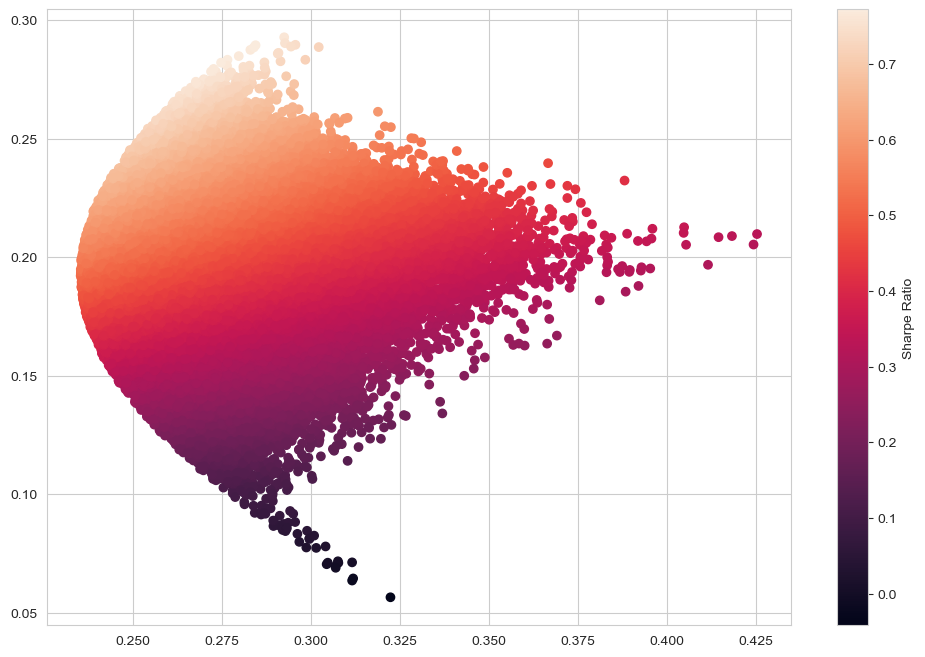

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"


First let's find out the Portfolio with the maximum Sharpe Ratio

In [12]:
sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

In [13]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  0.7721042062371952
Corresponding Return =   0.28210083123699337
Corresponding Risk =   0.27470492910620753


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [14]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.19588064851621614
IDFCFIRSTB.NS : 0.09811734264821069
TATAMOTORS.NS : 0.061323705563560565
NH.NS : 0.6433191512756689
EMAMILTD.NS : 0.0013591519963437604


Plotting the point of our portfolio with max sharpe

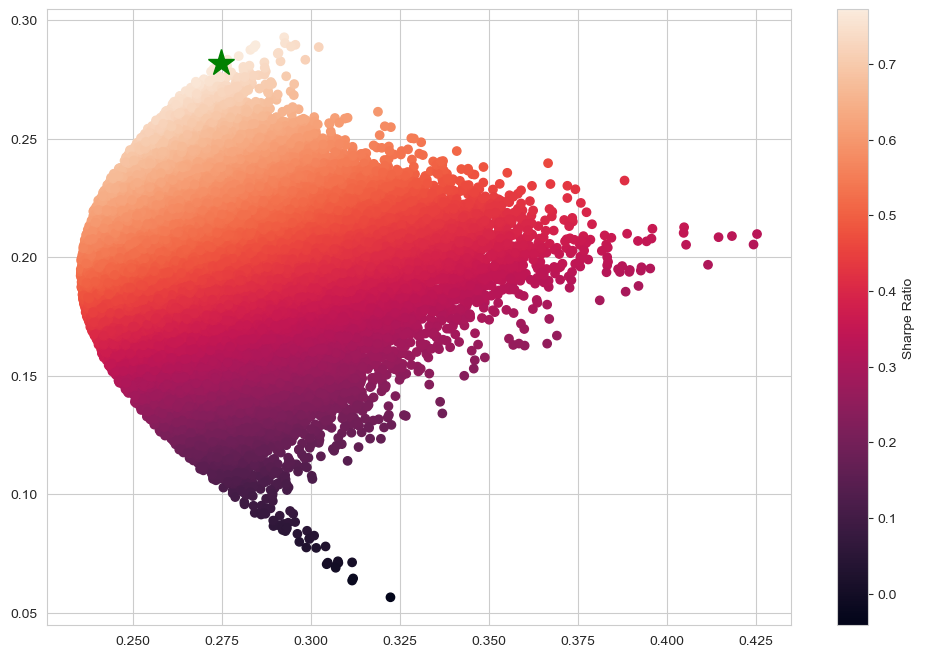

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

Now let's make a minimum risk portfolio

In [16]:
ind = 0 
for i in range(len(portfolio_risks)):
    if(portfolio_risks[i]==np.amin(portfolio_risks)):
        ind = i


In [17]:
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])

Minimum Risk =  0.2352762617405453
Corresponding Return =   0.19220847014047585


In [18]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.1480305870486368
IDFCFIRSTB.NS : 0.12002862612820217
TATAMOTORS.NS : 0.045002861605437
NH.NS : 0.3598654270133556
EMAMILTD.NS : 0.32707249820436846


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

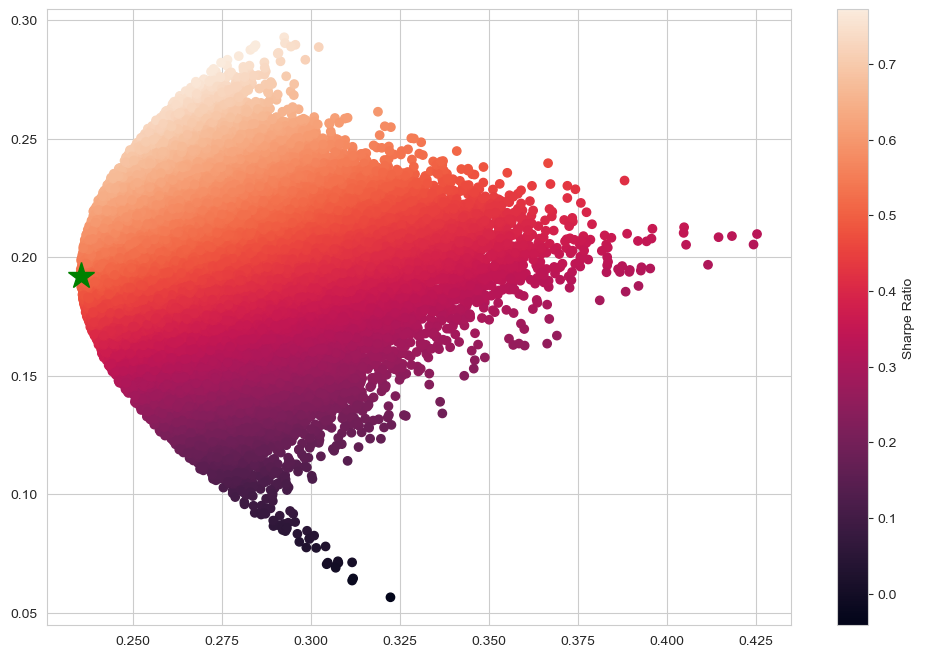

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk